# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 10

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
431,Fabianski,West Ham,51,10.000000,53,48.121492,5.3,4.812149,6.643151,4.698934,2.130855
325,Darlow,Newcastle Utd,50,10.000000,44,45.963012,4.4,4.596301,3.951987,4.579142,2.055528
96,Pope,Burnley,54,7.959184,39,34.850842,4.9,4.378696,5.354522,4.230123,1.884291
383,Lloris,Tottenham,55,10.000000,47,44.182358,4.7,4.418236,6.037164,4.306411,1.883942
12,Martínez,Aston Villa,48,8.936170,42,35.960464,4.7,4.024147,2.627089,4.614949,1.836763
417,Johnstone,West Brom,45,10.000000,41,38.923215,4.1,3.892322,4.846641,3.710376,1.834858
363,McCarthy,Southampton,46,10.000000,42,37.233265,4.2,3.723326,4.553582,3.763438,1.736010
455,Patrício,Wolves,55,10.000000,44,40.168851,4.4,4.016885,5.170818,3.768584,1.712806
8,Leno,Arsenal,50,10.000000,40,37.963012,4.0,3.796301,4.228795,3.811214,1.697758


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
277,Cancelo,Manchester City,56,5.000000,25,26.373194,5.0,5.274639,5.798373,5.653060,2.228942
232,Chilwell,Chelsea,62,7.000000,56,37.988948,8.0,5.426993,6.053712,5.421758,2.179533
389,Aurier,Tottenham,52,4.032258,25,19.705586,6.2,4.886985,3.568131,4.802506,2.143085
563,Ait Nouri,Wolves,50,3.015873,19,14.169971,6.3,4.698464,4.728681,4.425709,2.101217
470,Kilman,Wolves,43,7.021277,33,30.534205,4.7,4.348811,3.289863,4.079503,2.097183
123,James,Chelsea,51,9.038462,47,41.359058,5.2,4.575896,5.713712,4.549579,2.026241
461,Saïss,Wolves,51,6.031746,38,26.039942,6.3,4.317148,5.963273,4.046839,1.911665
435,Cresswell,West Ham,52,10.000000,47,42.391848,4.7,4.239185,3.643151,4.103936,1.859006
558,Coufal,West Ham,46,7.021277,33,27.788944,4.7,3.957819,4.296855,3.829661,1.845343


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
105,Jorginho,Chelsea,50,6.981132,37,34.880334,5.3,4.996372,1.498862,5.075599,2.234446
141,Zaha,Crystal Palace,73,7.941176,54,47.739731,6.8,6.011670,7.629261,6.096884,2.225019
37,Grealish,Aston Villa,77,8.987342,71,55.445087,7.9,6.169242,5.733668,6.609770,2.223241
302,Fernandes,Manchester Utd,109,9.024390,74,62.740409,8.2,6.952316,7.310542,7.051211,2.105796
254,Salah,Liverpool,122,9.012346,73,64.191373,8.1,7.122604,7.051980,7.529982,2.039196
390,Son,Tottenham,95,10.000000,87,61.475827,8.7,6.147583,4.919291,6.171084,1.994539
203,Harrison,Leeds United,55,9.047619,38,40.456596,4.2,4.471519,4.925063,4.437207,1.906662
40,Trézéguet,Aston Villa,53,8.928571,25,39.178117,2.8,4.387949,4.586772,4.762483,1.906003
557,Lookman,Fulham,50,7.073171,29,29.936421,4.1,4.232391,4.289146,4.120322,1.892783


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
506,Wilson,Newcastle Utd,65,9.054054,67,58.530356,7.4,6.464547,6.489659,6.932879,2.535604
202,Bamford,Leeds United,61,10.000000,62,60.580237,6.2,6.058024,6.980000,5.970122,2.452822
388,Kane,Tottenham,109,10.000000,86,74.651067,8.6,7.465107,4.937284,7.536044,2.261116
514,Watkins,Aston Villa,61,9.074074,49,50.030119,5.4,5.513523,5.420000,5.854496,2.232360
224,Vardy,Leicester City,103,9.041096,66,60.690356,7.3,6.712721,7.133532,6.605659,2.091607
164,Calvert-Lewin,Everton,79,10.000000,72,56.590119,7.2,5.659012,4.771388,5.646550,2.013386
377,Adams,Southampton,59,10.000000,50,48.760474,5.0,4.876047,4.761335,4.823152,2.007437
68,Maupay,Brighton,63,9.069767,39,44.350119,4.3,4.889885,3.200000,4.996160,1.948177
166,Richarlison,Everton,78,7.073171,29,35.280474,4.1,4.987929,4.858952,4.975795,1.785965


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,109,10.000000,86,74.651067,8.6,7.465107,7.902602,2.261116
254,Salah,Liverpool,122,9.012346,73,64.191373,8.1,7.122604,7.097390,2.039196
302,Fernandes,Manchester Utd,109,9.024390,74,62.740409,8.2,6.952316,6.574091,2.105796
224,Vardy,Leicester City,103,9.041096,66,60.690356,7.3,6.712721,7.153402,2.091607
506,Wilson,Newcastle Utd,65,9.054054,67,58.530356,7.4,6.464547,NaN,2.535604
251,Mané,Liverpool,120,8.928571,50,55.582612,5.6,6.225252,6.213180,1.797076
37,Grealish,Aston Villa,77,8.987342,71,55.445087,7.9,6.169242,NaN,2.223241
390,Son,Tottenham,95,10.000000,87,61.475827,8.7,6.147583,6.550412,1.994539
202,Bamford,Leeds United,61,10.000000,62,60.580237,6.2,6.058024,5.100497,2.452822


In [9]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
506,Wilson,Newcastle Utd,65,9.054054,7.4,6.464547,6.489659,NaN,6.932879,2.535604
202,Bamford,Leeds United,61,10.000000,6.2,6.058024,6.980000,5.100497,5.970122,2.452822
388,Kane,Tottenham,109,10.000000,8.6,7.465107,4.937284,7.902602,7.536044,2.261116
105,Jorginho,Chelsea,50,6.981132,5.3,4.996372,1.498862,5.756887,5.075599,2.234446
514,Watkins,Aston Villa,61,9.074074,5.4,5.513523,5.420000,NaN,5.854496,2.232360
277,Cancelo,Manchester City,56,5.000000,5.0,5.274639,5.798373,5.652124,5.653060,2.228942
141,Zaha,Crystal Palace,73,7.941176,6.8,6.011670,7.629261,7.165293,6.096884,2.225019
37,Grealish,Aston Villa,77,8.987342,7.9,6.169242,5.733668,NaN,6.609770,2.223241
232,Chilwell,Chelsea,62,7.000000,8.0,5.426993,6.053712,5.489739,5.421758,2.179533


In [10]:
metric = 'form 5'

display(df.loc[forwards].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
224,Vardy,Leicester City,103,9.041096,66,60.690356,7.3,6.712721,7.133532,6.605659,2.091607
202,Bamford,Leeds United,61,10.000000,62,60.580237,6.2,6.058024,6.980000,5.970122,2.452822
506,Wilson,Newcastle Utd,65,9.054054,67,58.530356,7.4,6.464547,6.489659,6.932879,2.535604
282,Jesus,Manchester City,93,4.000000,22,21.090119,5.5,5.272530,5.663373,5.557681,1.728931
514,Watkins,Aston Villa,61,9.074074,49,50.030119,5.4,5.513523,5.420000,5.854496,2.232360
366,Ings,Southampton,83,7.014925,47,35.400237,6.7,5.046417,5.168519,4.996601,1.751637
118,Abraham,Chelsea,72,9.047619,38,38.680237,4.2,4.275184,5.017754,4.347200,1.593267
388,Kane,Tottenham,109,10.000000,86,74.651067,8.6,7.465107,4.937284,7.536044,2.261116
117,Werner,Chelsea,95,10.000000,50,47.670356,5.0,4.767036,4.923581,4.843898,1.546631


In [11]:
metric = 'next1_xP'

display(df[midfielders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
141,Zaha,Crystal Palace,73,7.941176,54,47.739731,6.8,6.011670,7.165293,2.225019
254,Salah,Liverpool,122,9.012346,73,64.191373,8.1,7.122604,7.097390,2.039196
272,De Bruyne,Manchester City,117,7.959184,39,47.929776,4.9,6.021946,6.630332,1.760532
302,Fernandes,Manchester Utd,109,9.024390,74,62.740409,8.2,6.952316,6.574091,2.105796
390,Son,Tottenham,95,10.000000,87,61.475827,8.7,6.147583,6.550412,1.994539
251,Mané,Liverpool,120,8.928571,50,55.582612,5.6,6.225252,6.213180,1.797076
105,Jorginho,Chelsea,50,6.981132,37,34.880334,5.3,4.996372,5.756887,2.234446
275,Mahrez,Manchester City,83,7.031250,45,36.209950,6.4,5.149860,5.575667,1.787542
508,Rodríguez,Everton,78,9.038462,47,46.077035,5.2,5.097885,5.206139,1.825336


In [12]:
metric = 'xG'

display(df[defenders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
200,Dallas,Leeds United,45,10.000000,3.8,2.954508,2.421425,1.392768,1.1,0.5,1.6,0.160000
351,Baldock,Sheffield Utd,52,10.000000,1.7,3.266598,3.236283,1.432498,1.0,1.2,2.2,0.220000
412,Bartley,West Brom,44,6.923077,2.6,2.614544,3.173037,1.246435,1.0,0.0,1.0,0.144444
232,Chilwell,Chelsea,62,7.000000,8.0,5.426993,5.489739,2.179533,0.9,0.7,1.6,0.228571
298,Maguire,Manchester Utd,54,9.032258,3.1,3.044524,2.891470,1.310155,0.8,0.1,0.9,0.099643
255,Robertson,Liverpool,72,10.000000,4.5,4.328526,4.757336,1.613146,0.8,1.5,2.3,0.230000
41,Mings,Aston Villa,53,8.979592,4.9,3.273978,NaN,1.422125,0.8,0.2,1.0,0.111364
156,Keane,Everton,51,10.000000,3.0,2.916573,3.493971,1.291480,0.8,0.2,1.0,0.100000
389,Aurier,Tottenham,52,4.032258,6.2,4.886985,5.397535,2.143085,0.7,0.4,1.1,0.272800


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))

#display(game_weeks)
#display(column_xPoints)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xPoints week 4,xG_week4,goals_week4,xGA_week4,cleansheet_week4,xA_week4,assists_week4,xPoints week 5,xG_week5,goals_week5,xGA_week5,cleansheet_week5,xA_week5,assists_week5,xPoints week 6,xG_week6,goals_week6,xGA_week6,cleansheet_week6,xA_week6,assists_week6,xPoints week 7,xG_week7,goals_week7,xGA_week7,cleansheet_week7,xA_week7,assists_week7,xPoints week 8,xG_week8,goals_week8,xGA_week8,cleansheet_week8,xA_week8,assists_week8,xPoints week 9,xG_week9,goals_week9,xGA_week9,cleansheet_week9,xA_week9,assists_week9,form 5,next1_xP,next5_xP,next10_xP,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
114,3,6,106,100.0,100.0,3,124183,1.0,NaN,0,0,3,-3,180.5,31,23,NaN,NaN,2,3,5.8,5.3,2,Hakim,5.3,2,1,34.9,90,50,False,117.4,158,58,357,NaN,2020-08-29T17:30:07.487245Z,83,0,0,NaN,0,NaN,124183.jpg,5.3,0,0,Ziyech,17.9,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,0.0,0.0,2.2,0.0,0.1,0.0,1.0,0.0,0.0,0.7,0.0,0.0,0.0,8.25909,0.1,1.0,0.4,1.0,0.3,1.0,11.962687,0.1,0.0,0.6,0.0,1.2,2.0,3.096585,0.0,0.0,0.7,1.0,0.2,0.0,5.46464,4.961104,4.630545,4.580929,0.553475,1.594545,2.3,0.380937


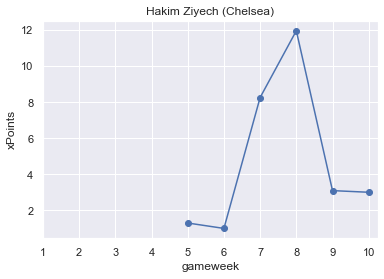

In [14]:
# find player index
name_string = 'Ziye'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 508
plt.plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
plt.title(title_string)
plt.xlabel('gameweek')
plt.ylabel('xPoints')
plt.xticks(game_weeks)
plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Pulisi')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xPoints week 4,xG_week4,goals_week4,xGA_week4,cleansheet_week4,xA_week4,assists_week4,xPoints week 5,xG_week5,goals_week5,xGA_week5,cleansheet_week5,xA_week5,assists_week5,xPoints week 6,xG_week6,goals_week6,xGA_week6,cleansheet_week6,xA_week6,assists_week6,xPoints week 7,xG_week7,goals_week7,xGA_week7,cleansheet_week7,xA_week7,assists_week7,xPoints week 8,xG_week8,goals_week8,xGA_week8,cleansheet_week8,xA_week8,assists_week8,xPoints week 9,xG_week9,goals_week9,xGA_week9,cleansheet_week9,xA_week9,assists_week9,form 5,next1_xP,next5_xP,next10_xP,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
119,0,0,23,100.0,100.0,1,176413,NaN,NaN,0,0,-3,3,14.9,295,156,NaN,NaN,0,3,0.8,0.3,1,Christian,0.3,2,0,11.8,283,133,False,26.6,328,140,189,NaN,2020-10-31T18:00:12.906132Z,82,0,0,NaN,0,NaN,176413.jpg,1.8,0,0,Pulisic,1.7,False,...,1.0,0.0,0.0,0.1,0.0,0.0,0.0,2.910803,0.1,0.0,2.2,0.0,0.1,0.0,2.996585,0.1,0.0,0.7,1.0,0.0,0.0,NaN,NaN,NaN,0.4,0.0,NaN,NaN,NaN,NaN,NaN,0.6,0.0,NaN,NaN,NaN,NaN,NaN,0.7,0.0,NaN,NaN,1.998293,2.292111,2.253737,2.235713,0.27469,0.786591,0.3,0.077143


In [16]:
my_starting11 = [363,232,77,239,254,302,37,508,114,202,388]
my_subs = [35,200,146,262]

In [17]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
363,McCarthy,Southampton,46,10.000000,4.2,3.723326,4.553582,3.597510,3.763438,1.736010
232,Chilwell,Chelsea,62,7.000000,8.0,5.426993,6.053712,5.489739,5.421758,2.179533
77,Lamptey,Brighton,48,9.032258,3.1,3.542310,3.770444,3.993602,3.618220,1.616836
239,Justin,Leicester City,49,10.000000,3.5,2.885655,2.853265,3.133503,2.820165,1.303606
254,Salah,Liverpool,122,9.012346,8.1,7.122604,7.051980,7.097390,7.529982,2.039196
302,Fernandes,Manchester Utd,109,9.024390,8.2,6.952316,7.310542,6.574091,7.051211,2.105796
37,Grealish,Aston Villa,77,8.987342,7.9,6.169242,5.733668,NaN,6.609770,2.223241
508,Rodríguez,Everton,78,9.038462,5.2,5.097885,3.619695,5.206139,5.108701,1.825336
114,Ziyech,Chelsea,83,6.037736,5.3,4.593839,5.464640,4.961104,4.630545,1.594545



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
35,Nyland,Aston Villa,40,NaN,0.0,NaN,NaN,NaN,NaN,NaN
200,Dallas,Leeds United,45,10.000000,3.8,2.954508,3.137142,2.421425,2.994655,1.392768
146,Mitchell,Crystal Palace,41,6.000000,2.5,2.565209,3.931484,3.483099,2.386215,1.266867
262,Brewster,Sheffield Utd,45,6.153846,1.3,1.950000,2.200000,2.016062,1.928718,0.919239


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)